In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

texts = []

for filename in os.listdir('archive'):
    if filename.endswith('.txt'):
        with open(os.path.join('archive', filename), 'r', encoding='latin1') as file:
            texts.append(file.read())



In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfIdf = TfidfVectorizer(stop_words='english')
X = tfIdf.fit_transform(texts)

## Shape of TF IDF matrix before applying PCA

In [38]:
X.shape

(20, 185261)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X.toarray())

## Shape of TF IDF matrix after PCA is applies, columns decomposed to 2.

In [40]:
X_pca.shape

(20, 2)

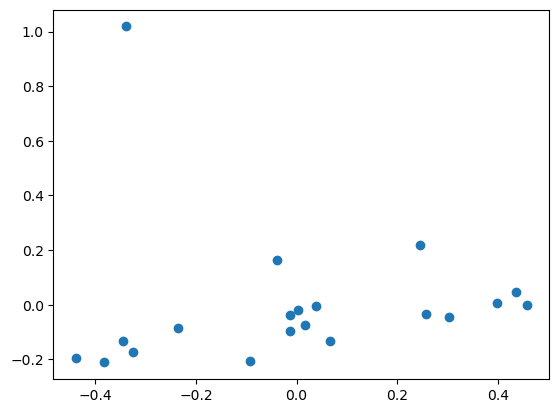

In [41]:
plt.scatter(X_pca[:, 0], X_pca[:,1])

In [66]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=18, random_state=8)

labels = model.fit_predict(X)

In [67]:
labels

array([10, 17,  7,  4, 15,  5,  2, 13, 11, 16,  3, 14,  0,  4, 12,  9,  8,
        0,  6,  1], dtype=int32)

In [60]:
model.cluster_centers_

array([[0.01483409, 0.00510569, 0.00025491, ..., 0.        , 0.        ,
        0.        ],
       [0.00651396, 0.01469816, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01143073, 0.00415663, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00439253, 0.0029949 , 0.        , ..., 0.        , 0.        ,
        0.00066914],
       [0.02856361, 0.0015781 , 0.00029152, ..., 0.        , 0.        ,
        0.        ],
       [0.00867292, 0.0009486 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

We use pca to project them in to a 2d space

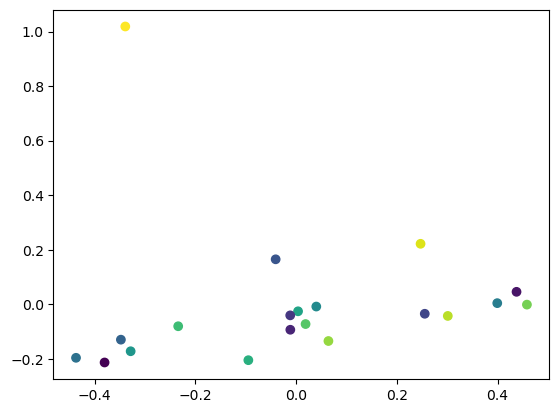

In [61]:
means_pca = pca.fit_transform(model.cluster_centers_)
plt.scatter(means_pca[:, 0], means_pca[:,1], c=model.labels_)

In [68]:
from sklearn.metrics import silhouette_score

silhouette_score(X.toarray(), labels)

0.02462065261453869

I was getting an error when I used n_clusters as 20, which I think was because the metric needs labels to be less than the number of rows.

Text(0.5, 1.0, 'Clusterd')

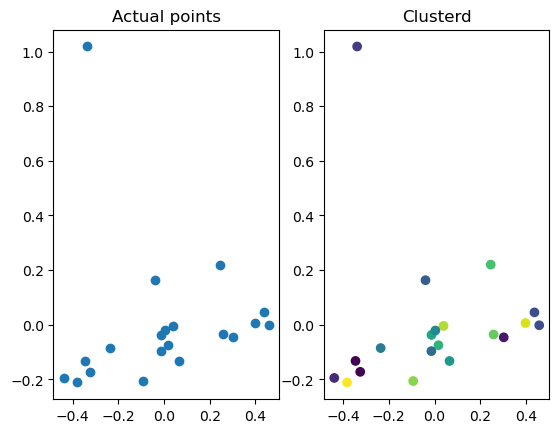

In [71]:
fig, axes = plt.subplots(1,2)

axes[0].scatter(X_pca[:,0], X_pca[:,1])
axes[0].set_title('Actual points')

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=labels)
axes[1].set_title('Clusterd')